# Homework #1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv

sns.set(style="ticks", color_codes=True)
%matplotlib inline

df = pd.read_fwf("./auto-mpg.data", header=None)
df = df[( df[3]!='?' )]
df.drop(columns=[8], inplace=True)
df.columns = ['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acceleration', 'year','origin']

## Problem 1

In [2]:
groups = np.array_split(df.sort_values(by="mpg"), 4)
groups[0]['class'] = "low"
groups[1]['class'] = "medium"
groups[2]['class'] = "high"
groups[3]['class'] = "very high"
df = pd.concat(groups)

In [3]:
print('Category low is between ' + str(groups[0].head(1)['mpg'].values[0]) + ' and ' + str(groups[0].tail(1)['mpg'].values[0]) + ' mpg.')
print('Category medium is between ' + str(groups[1].head(1)['mpg'].values[0]) + ' and ' + str(groups[1].tail(1)['mpg'].values[0]) + ' mpg.')
print('Category high is between ' + str(groups[2].head(1)['mpg'].values[0]) + ' and ' + str(groups[2].tail(1)['mpg'].values[0]) + ' mpg.')
print('Category very high is between ' + str(groups[3].head(1)['mpg'].values[0]) + ' and ' + str(groups[3].tail(1)['mpg'].values[0]) + ' mpg.')



Category low is between 9.0 and 17.0 mpg.
Category medium is between 17.0 and 22.5 mpg.
Category high is between 23.0 and 29.0 mpg.
Category very high is between 29.0 and 46.6 mpg.


## Problem 2

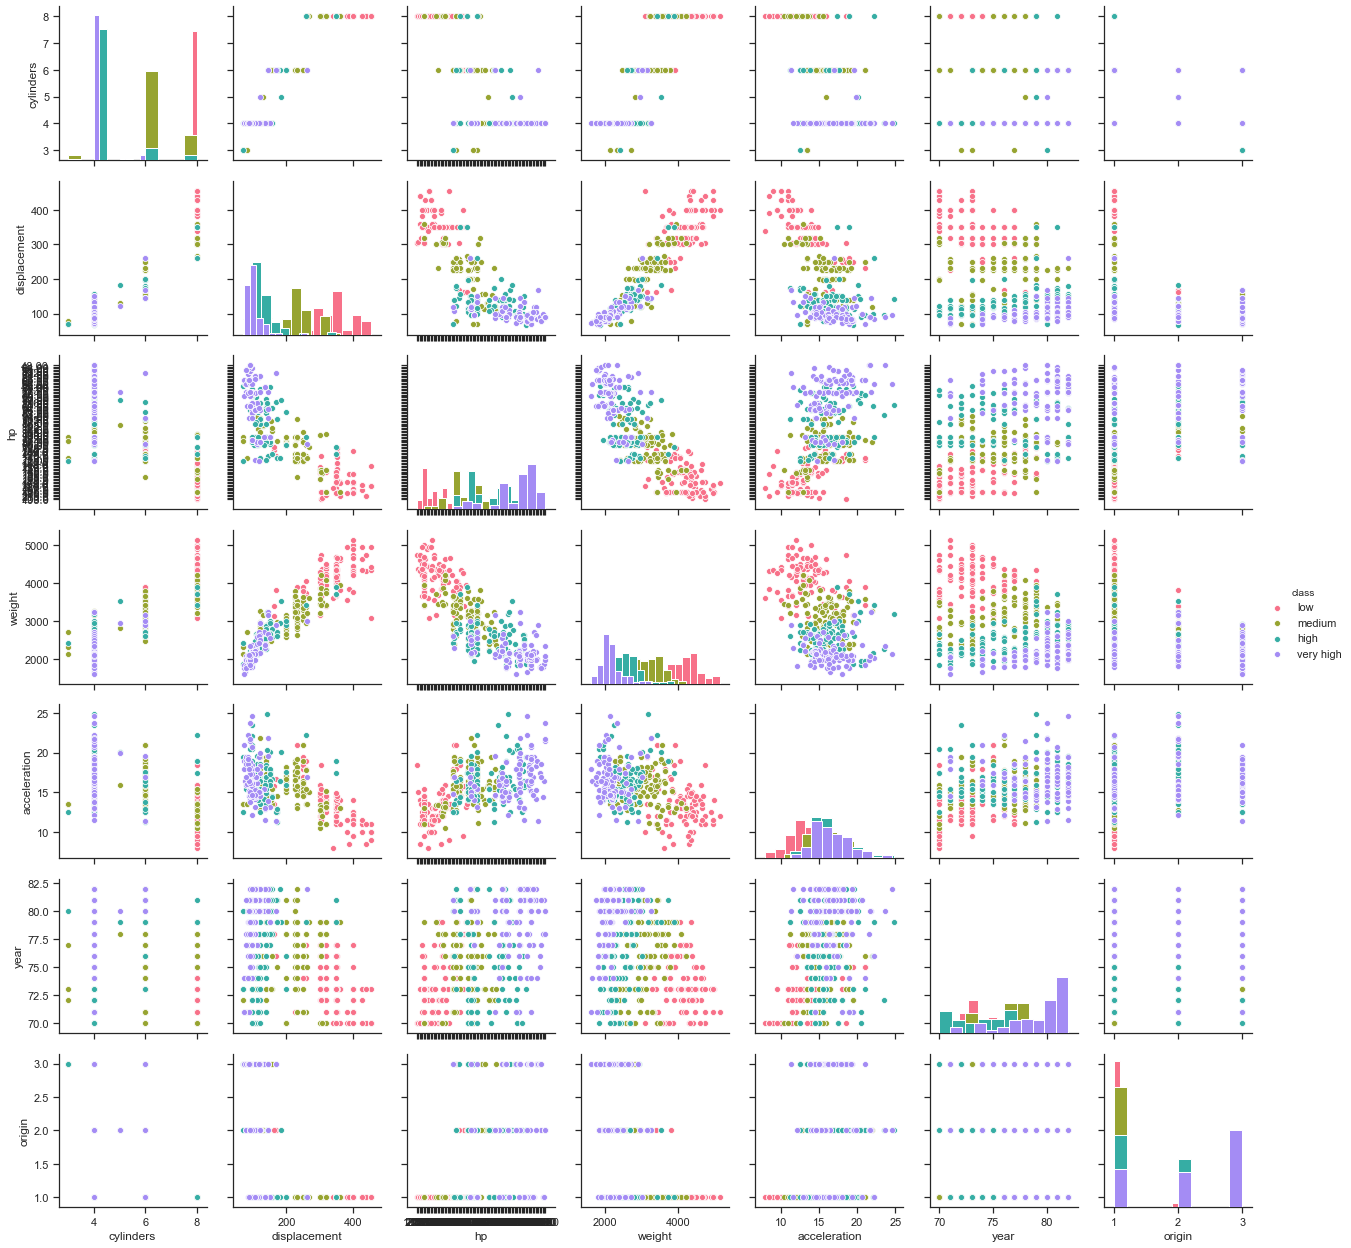

In [4]:
sns.pairplot(df, hue="class", diag_kind="hist", palette="husl", vars=['cylinders', 'displacement', 'hp', 'weight', 'acceleration', 'year','origin'])

In [5]:
print('The plots that are most informative, are the ones with clear clustering. Plots like (2,4), (3,6), (6,2) show good separatino between clusters.')
print('Note: (row,col) points to the plot in ith row and jth column.')

The plots that are most informative, are the ones with clear clustering. Plots like (2,4), (3,6), (6,2) show good separatino between clusters.
Note: (row,col) points to the plot in ith row and jth column.


## Problem 3

In [6]:
# The linear_regression function is a generic lin. reg. function that can take 
#both a column vector or a matrix as input.
# The output is of the form: w = [ [w0], [w0,w1], ... ]

def linear_regression( x, n, y=df['mpg'] ):
    if len(x) != len(y):
        return "The dimensions of X and Y don't match!"
    
    X = None
    Y = np.array([y])
    ones = np.ones(shape=y.shape)[..., None]
    base = []
    if isinstance(x, pd.Series): # if x is column vector, make it a row.
        base = np.array([x]).astype(np.float).transpose() #turns "hp" into char. why?
    else: 
        base = np.array(x).astype(np.float) # if x is a matrix, leave as is.

    if n == 0:
        X = ones
    else:
        cols = base
        for i in range(2, n+1):
            cols = np.concatenate((cols, base**i), 1)
        X = np.concatenate((ones, cols), 1)
    return inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)

## Problem 4

In [7]:
from sklearn.model_selection import train_test_split

x_data = df.drop(columns=["mpg", "class"])
y_data = df["mpg"]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=100, random_state=42, shuffle=1)

In [8]:
def feature_regress():
    for feature in X_train:
        row = []
        for i in range(0,4):
            row.append( linear_regression(X_train[feature], i, y_train).round(2) )
        grpah_feature(row, X_test[feature].astype(np.float), y_test, feature)

In [9]:
def grpah_feature(w, x, y, xlabel, ylabel = "mpg"):
# w = [ [w0], [w0,w1], ... ]
    f1 = w[1][0] + w[1][1]*x
    f2 = w[2][0] + w[2][1]*x + w[2][2]*(x**2)
    f3 = w[3][0] + w[3][1]*x + w[3][2]*(x**2) + w[3][3]*(x**3)
    
    x_tr=X_train[xlabel].astype(np.float)
    f1_tr = w[1][0] + w[1][1]*x_tr
    f2_tr = w[2][0] + w[2][1]*x_tr + w[2][2]*(x_tr**2)
    f3_tr = w[3][0] + w[3][1]*x_tr + w[3][2]*(x_tr**2) + w[3][3]*(x_tr**3)
    
    plt.scatter(x,y_test)
    plt.scatter(x,y_test)
    plt.scatter(x,y_test)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend( ["1", "2", "3"] )
    plt.axhline(y=w[0][0], linestyle='-') #put this into legend
    plt.plot(x,f1)
    plt.plot(x,f2)
    plt.plot(x,f3)
    plt.show()
    
    print('Testing MSE 0 deg: ' + str(mean_squared_error(y_test, np.repeat(w[0][0],100))))
    print('Testing MSE 1 deg: ' + str(mean_squared_error(y_test, f1).round(2)))
    print('Testing MSE 2 deg: ' + str(mean_squared_error(y_test, f2).round(2)))
    print('Testing MSE 3 deg: ' + str(mean_squared_error(y_test, f3).round(2)))
    print('')
    print('Training MSE 0 deg: ' + str(mean_squared_error(y_train, np.repeat(w[0][0],292))))
    print('Training MSE 1 deg: ' + str(mean_squared_error(y_train, f1_tr).round(2)))
    print('Training MSE 2 deg: ' + str(mean_squared_error(y_train, f2_tr).round(2)))
    print('Training MSE 3 deg: ' + str(mean_squared_error(y_train, f3_tr).round(2)))

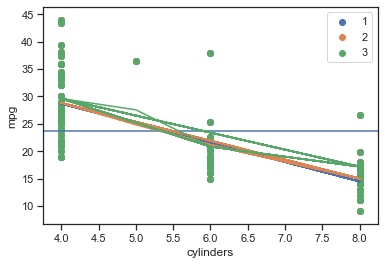

Testing MSE 0 deg: 66.17905999999999
Testing MSE 1 deg: 26.53
Testing MSE 2 deg: 26.27
Testing MSE 3 deg: 27.47

Training MSE 0 deg: 59.04026438356164
Training MSE 1 deg: 23.16
Training MSE 2 deg: 23.08
Training MSE 3 deg: 21.86


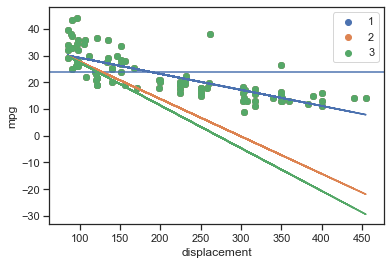

Testing MSE 0 deg: 66.17905999999999
Testing MSE 1 deg: 26.17
Testing MSE 2 deg: 198.86
Testing MSE 3 deg: 297.61

Training MSE 0 deg: 59.04026438356164
Training MSE 1 deg: 19.74
Training MSE 2 deg: 160.74
Training MSE 3 deg: 241.71


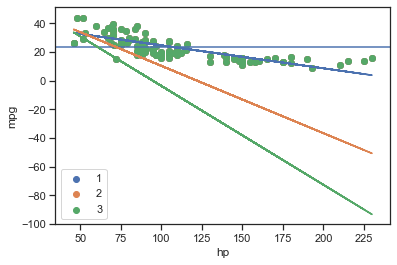

Testing MSE 0 deg: 66.17905999999999
Testing MSE 1 deg: 28.97
Testing MSE 2 deg: 474.2
Testing MSE 3 deg: 1570.97

Training MSE 0 deg: 59.04026438356164
Training MSE 1 deg: 22.47
Training MSE 2 deg: 373.9
Training MSE 3 deg: 1277.89


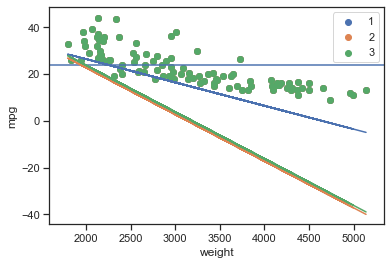

Testing MSE 0 deg: 66.17905999999999
Testing MSE 1 deg: 82.81
Testing MSE 2 deg: 639.75
Testing MSE 3 deg: 593.94

Training MSE 0 deg: 59.04026438356164
Training MSE 1 deg: 63.99
Training MSE 2 deg: 504.3
Training MSE 3 deg: 464.36


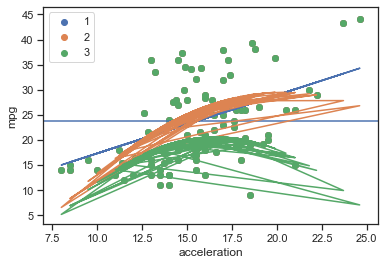

Testing MSE 0 deg: 66.17905999999999
Testing MSE 1 deg: 51.08
Testing MSE 2 deg: 60.84
Testing MSE 3 deg: 87.06

Training MSE 0 deg: 59.04026438356164
Training MSE 1 deg: 49.62
Training MSE 2 deg: 48.73
Training MSE 3 deg: 76.75


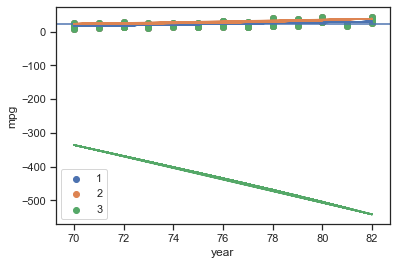

Testing MSE 0 deg: 66.17905999999999
Testing MSE 1 deg: 38.08
Testing MSE 2 deg: 66.62
Testing MSE 3 deg: 209061.8

Training MSE 0 deg: 59.04026438356164
Training MSE 1 deg: 41.2
Training MSE 2 deg: 63.35
Training MSE 3 deg: 218060.53


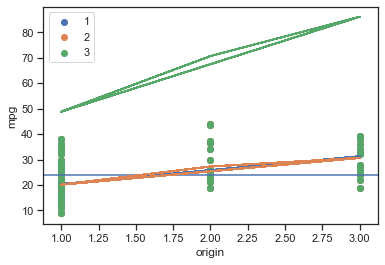

Testing MSE 0 deg: 66.17905999999999
Testing MSE 1 deg: 48.73
Testing MSE 2 deg: 47.32
Testing MSE 3 deg: 1369.37

Training MSE 0 deg: 59.04026438356164
Training MSE 1 deg: 38.83
Training MSE 2 deg: 38.34
Training MSE 3 deg: 1548.42


In [10]:
feature_regress()

The 1st order performs best. The features that is most informative is "Acceleration".

## Problem 5

In [11]:
# The linear_regression function from Problem 3, can handle multiple features as input.
def get_MSE(mode):
    X = X_train if mode=="Training" else X_test
    y = y_train if mode=="Training" else y_test
    
    w0 = linear_regression( X_train, 0 , y_train )
    ones = np.ones(shape=y.shape)[..., None]
    X_ones = ones
    f0=w0*X_ones

    w1 = linear_regression( X_train, 1 , y_train )
    X_ones = np.concatenate((ones, X), 1)
    f1 = X_ones.astype(np.float).dot(w1)

    w2 = linear_regression( X_train, 2 , y_train )
    X_ones = np.concatenate((X_ones, X.astype(np.float)**2), 1)
    f2 = X_ones.astype(np.float).dot(w2)

    print(mode+ ' MSE 0 deg: ' + str(mean_squared_error(y, f0).round(2)))
    print(mode+ ' MSE 1 deg: ' + str(mean_squared_error(y, f1).round(2)))
    print(mode+ ' MSE 2 deg: ' + str(mean_squared_error(y, f2).round(2)))
get_MSE("Training")
print('')
get_MSE("Testing")

Training MSE 0 deg: 59.04
Training MSE 1 deg: 9.98
Training MSE 2 deg: 6.88

Testing MSE 0 deg: 66.18
Testing MSE 1 deg: 13.83
Testing MSE 2 deg: 9.08


## Problem 6

In [12]:
from sklearn.metrics import precision_score
x_data_lr = df.drop(columns=['mpg',"class"])
y_data_lr = df["class"]
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(x_data_lr, y_data_lr, test_size=100, random_state=42, shuffle=1)

log_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
log_model.fit( X_train_lr, y_train_lr )
predictions = log_model.predict(X_test_lr)
classification_report(y_test_lr, predictions)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


'              precision    recall  f1-score   support\n\n        high       0.61      0.64      0.62        22\n         low       0.96      0.87      0.92        31\n      medium       0.74      0.74      0.74        27\n   very high       0.73      0.80      0.76        20\n\n    accuracy                           0.77       100\n   macro avg       0.76      0.76      0.76       100\nweighted avg       0.78      0.77      0.77       100\n'

The testing precision is 87%.

## Problem 7

In [13]:
scaler = preprocessing.MinMaxScaler()
scaled_X_train_lr = scaler.fit_transform(X_train_lr)
scaled_X_test_lr = scaler.fit_transform(X_test_lr)
log_model.fit( scaled_X_train_lr, y_train_lr )
predictions = log_model.predict(X_test_lr)
classification_report(y_test_lr, predictions)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n        high       0.00      0.00      0.00        22\n         low       0.31      1.00      0.47        31\n      medium       0.00      0.00      0.00        27\n   very high       0.00      0.00      0.00        20\n\n    accuracy                           0.31       100\n   macro avg       0.08      0.25      0.12       100\nweighted avg       0.10      0.31      0.15       100\n'

The testing precision has improved to 100%.

## Problem 8

In [14]:
new_car = np.array( [4, 400, 150, 3500, 8, 81, 1] )
new_car_lr = np.concatenate([new_car, new_car**2])
new_car_lr = np.concatenate([[1], new_car_lr])
w = linear_regression(df.drop(columns=['mpg', 'class']), 2)
predicted_mpg = w.transpose().dot(new_car_lr).round(2)
predicted_class = log_model.predict([new_car])[0]

In [15]:
print('The predicted MPG is: ' + str(predicted_mpg) + ' and it classified as: ' + str(predicted_class))

The predicted MPG is: 23.8 and it classified as: low
